In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [230]:
df24 = pd.read_csv('/pampa/cloutier/etc24_consec.csv')

In [231]:
# séparer le dataframe par saison
son = df24.loc[(df24.season == 'SON') & (df24.HU == True)]
djf = df24.loc[(df24.season == 'DJF') & (df24.HU == True)]
mam = df24.loc[(df24.season == 'MAM') & (df24.HU == True)]
jja = df24.loc[(df24.season == 'JJA') & (df24.HU == True)]

In [232]:
# determiner la vorticité moyenne pour chaque tempête 
son_vors = son.groupby('storm')['VORS_av08'].mean()
djf_vors = djf.groupby('storm')['VORS_av08'].mean()
mam_vors = mam.groupby('storm')['VORS_av08'].mean()
jja_vors = jja.groupby('storm')['VORS_av08'].mean()

In [235]:
# déterminer les valeurs standardisés de la moyenne de VORS pour chaque tempête
son_std_vors = (son_vors - son_vors.mean()) / son_vors.std()
djf_std_vors = (djf_vors - djf_vors.mean()) / djf_vors.std()
mam_std_vors = (mam_vors - mam_vors.mean()) / mam_vors.std()
jja_std_vors = (jja_vors - jja_vors.mean()) / jja_vors.std()

In [234]:
bins = np.arange(-2, 5, 0.5)

In [237]:
# Déterminer les occurences de chaque valeur pour chaque bin établi
son_frequency, _ = np.histogram(son_std_vors, bins=bins)
djf_frequency, _ = np.histogram(djf_std_vors, bins=bins)
mam_frequency, _ = np.histogram(mam_std_vors, bins=bins)
jja_frequency, _ = np.histogram(jja_std_vors, bins=bins)

[ 90 175 286 281 311 234 158  84  23  14   2   0   0]


In [51]:
# Déterminer la fréquence (%) de chaque occurence

son_tot_etc = len(son_std_vors)
djf_tot_etc = len(djf_std_vors)
mam_tot_etc = len(mam_std_vors)
jja_tot_etc = len(jja_std_vors)

son_pct = (son_frequency / son_tot_etc) * 100
djf_pct = (djf_frequency / djf_tot_etc) * 100
mam_pct = (mam_frequency / mam_tot_etc) * 100
jja_pct = (jja_frequency / jja_tot_etc) * 100

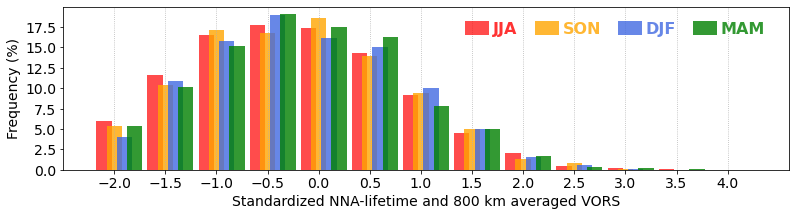

In [247]:
# Taille des carrés de couleur dans la légende
plt.rcParams['legend.handlelength'] = 1.5
plt.rcParams['legend.handleheight'] = 1
plt.rcParams['legend.numpoints'] = 1.5

# bar plot
plt.figure(figsize=(13,3))
plt.bar(bins[:-1]-0.1, jja_pct, width=0.15, alpha=0.7,label='JJA', color='red')
plt.bar(bins[:-1], son_pct, width=0.15, alpha=0.8, label='SON',color='orange')
plt.bar(bins[:-1]+0.1, djf_pct, width=0.15, alpha=0.8, label='DJF', color='royalblue')
plt.bar(bins[:-1]+0.2, mam_pct, width=0.15, alpha=0.8, label='MAM', color='g')

plt.xticks(bins[:-1])

# legend customization
colors = ['red', 'orange', 'royalblue', 'g']
legend = plt.legend(frameon=False, ncol=4, fontsize=16, columnspacing=0.5)
for i, color in zip(range(0,4), colors):
    legend.get_texts()[i].set_position((-9, 0.5))
    first_text = legend.get_texts()[i]  # Get the first legend text
    first_text.set_fontweight('bold')  # Set font weight to bold
    first_text.set_color(color)
    first_text.set_alpha(0.8)

plt.xlabel('Standardized NNA-lifetime and 800 km averaged VORS', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Frequency (%)', fontsize=14)
plt.grid(which='major', axis='x', linestyle='dotted')
plt.show()

In [402]:
mean = vors['VORS_av08'].mean()
sigma = vors['VORS_av08'].std()

mean = '{:0.2e}'.format(mean)
sigma = '{:0.2e}'.format(sigma)


mean = mean[0 : 4]
sigma = sigma[0 : 4]

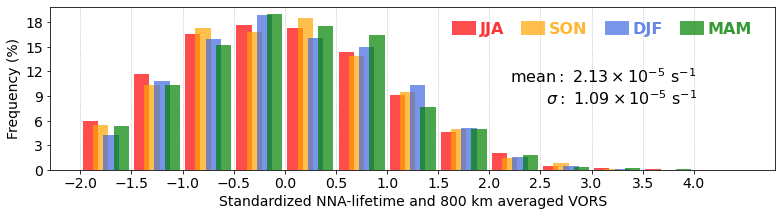

In [403]:
df24 = pd.read_csv('/pampa/cloutier/etc24_no_consec.csv')

seasons = ['JJA', 'SON', 'DJF', 'MAM']
bins = np.arange(-2, 5, 0.5)
i = 0.1 # shift bars ne
plt.figure(figsize=(13,3))
colors = ['red', 'orange', 'royalblue', 'g']
max_pct = 0

for season, color in zip (seasons, colors) : 
    df = df24.loc[(df24.season == season) & (df24.HU == True)]
    avg_vors = df.groupby('storm')['VORS_av08'].mean()
    std_vors = (avg_vors - avg_vors.mean()) / avg_vors.std()
    frequency, _ = np.histogram(std_vors, bins=bins)
    tot_etc = len(std_vors)
    pct = (frequency / tot_etc) * 100
    
    plt.bar(bins[:-1]+i, pct, width=0.15, alpha=0.7,label=season, color=color)
    
    # establish the max frequency for y axis limit on the bar plot later
    
    if max(pct) > max_pct : 
        max_pct = max(pct)
    i += 0.1
    
plt.xticks(bins[:-1])

# legend customization

legend = plt.legend(frameon=False, ncol=len(seasons), fontsize=16, columnspacing=0.5)
for i, color in zip(range(0,len(seasons)), colors):
    legend.get_texts()[i].set_position((-9, 0.5))
    first_text = legend.get_texts()[i]  # Get the first legend text
    first_text.set_fontweight('bold')  # Set font weight to bold
    first_text.set_color(color)
    first_text.set_alpha(0.8)

plt.xlabel('Standardized NNA-lifetime and 800 km averaged VORS', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yticks(np.arange(0, max_pct, 3))
plt.ylabel('Frequency (%)', fontsize=14)
plt.grid(which='major', axis='x', linestyle='dotted')

textstr = '\n'.join((
    r'$\mathrm{mean}:\ %s \times 10^{-5} \ \mathrm{s^{-1}}$' % mean,
    r'$\qquad \ \sigma:\ %s \times 10^{-5} \ \mathrm{s^{-1}}$' % sigma))

plt.text(2.2, 8, textstr, fontsize=16)

plt.show()   


In [401]:
vors = df24.loc[df24.HU == True]

print('mean               : ' , "{:.2e}".format(vors['VORS_av08'].mean()))
print('standard deviation : ', "{:.2e}".format(vors['VORS_av08'].std()))

mean               :  2.13e-05
standard deviation :  1.09e-05
